In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

Se escogió el Dataset con el cual se trabajará.

In [2]:
ruta = 'C:\\Users\\gerson.molina\\Desktop\\Data Scientis\\Datasets'
os.chdir(ruta)

df = pd.read_excel("Amazon_Sales_Report.xlsx")

Se Realiza la Exploración de los Datos.

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [4]:
df.shape

(128975, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [6]:
valores_nulos = df.isnull().sum()
valores_nulos

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               40
ship-postal-code         40
ship-country             40
promotion-ids         49160
B2B                       7
fulfilled-by          89699
dtype: int64

Limpieza de los datos.

In [7]:
#Se llenó los valores nulos con la sintaxis 'No especificado'.
df['Courier Status'].fillna('No especificado', inplace=True)
df['ship-city'].fillna('No especificado', inplace=True)
df['ship-state'].fillna('No especificado', inplace=True)
df['ship-postal-code'].fillna('No especificado', inplace=True)
df['ship-country'].fillna('No especificado', inplace=True)
df['promotion-ids'].fillna('No especificado', inplace=True)

#Se eliminaron estas filas con valores nulos ya que no se consideraron indispensables para el análisis.
df.dropna(subset=['currency', 'Amount'], inplace=True)

#Se consideró llenar los valores nulos con la moda.
mode_b2b = df['B2B'].mode()[0]
df['B2B'].fillna(mode_b2b, inplace=True)
mode_fulfilled_by = df['fulfilled-by'].mode()[0]
df['fulfilled-by'].fillna(mode_fulfilled_by, inplace=True)

In [8]:
#Verificamos.
df.isnull().sum().any()

False

In [9]:
#Se procede a realizar el resumen estadístico.

df.describe()

,index,Qty,Amount
count,121180.000000,121180.000000,121180.000000
mean,64483.115877,0.961231,648.561465
std,37222.531993,0.214354,281.211687
min,0.000000,0.000000,0.000000
25%,32285.750000,1.000000,449.000000
50%,64474.500000,1.000000,605.000000
75%,96680.250000,1.000000,788.000000
max,128974.000000,8.000000,5584.000000


Gráficos Con Matplotlib.

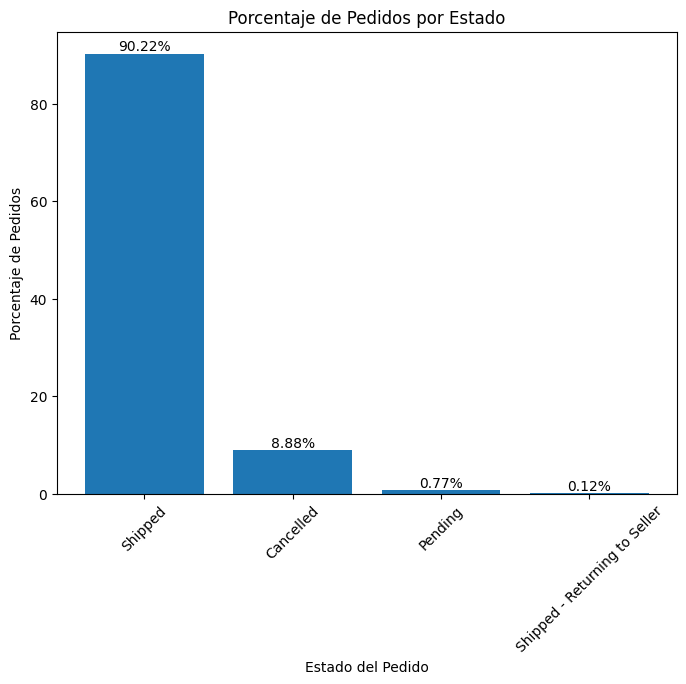

In [10]:
cuenta_estado_pedido = df['Status'].value_counts()
total_pedidos = len(df) 

porcentajes = (cuenta_estado_pedido / total_pedidos) * 100

plt.figure(figsize=(8, 6))
plt.bar(porcentajes.index, porcentajes.values)
plt.xlabel('Estado del Pedido')
plt.ylabel('Porcentaje de Pedidos')
plt.title('Porcentaje de Pedidos por Estado')
plt.xticks(rotation=45)

for i, porcentaje in enumerate(porcentajes):
    plt.text(i, porcentaje, f'{porcentaje:.2f}%', ha='center', va='bottom')

plt.show()

Podemos determinar que la mayoría de los productos fueron enviados con éxito, sin embargo, se observa un notable número en cuanto a cancelaciones, esto podría sugerir algunos problemas en el proceso del pedido o una clara insatisfacción del cliente.

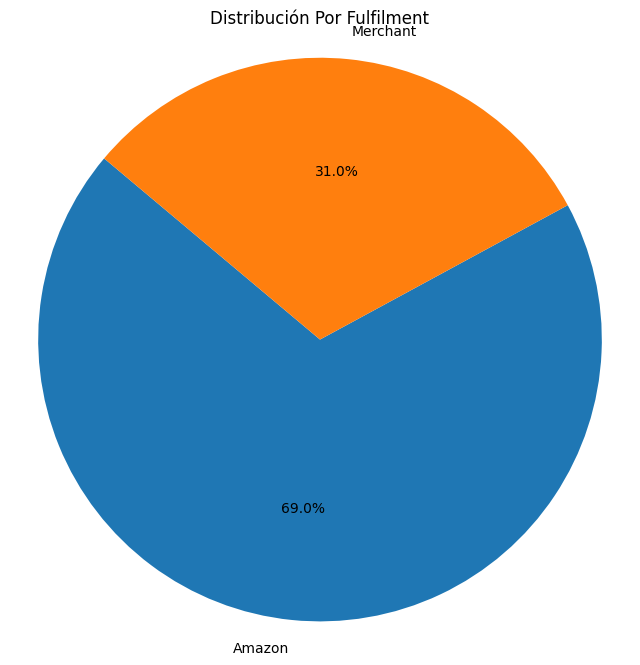

In [11]:
cuenta_fulfilment = df['Fulfilment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cuenta_fulfilment, labels=cuenta_fulfilment.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución Por Fulfilment')
plt.show()

Amazon tiene una participación significativa en comparación a los vendedores individuales.

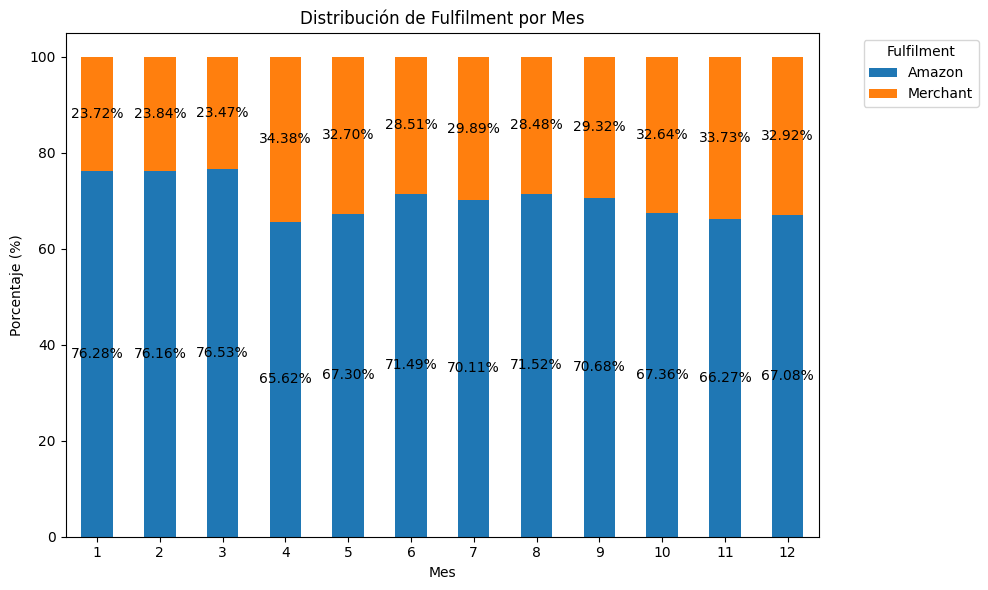

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

fulfilment_cuenta = df.groupby(['Month', 'Fulfilment']).size().unstack(fill_value=0)
total_por_mes = fulfilment_cuenta.sum(axis=1)

fulfilment_porcentaje = (fulfilment_cuenta.div(total_por_mes, axis=0) * 100).round(2)

ax = fulfilment_porcentaje.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Fulfilment por Mes')
plt.xlabel('Mes')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.legend(title='Fulfilment', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()

Al análizar las ventas por fulfilment en relación a los meses, podemos notar que la tendencia se conserva a lo largo del tiempo, siendo amazon el lider en ventas.

Gráficos con Seaborn.

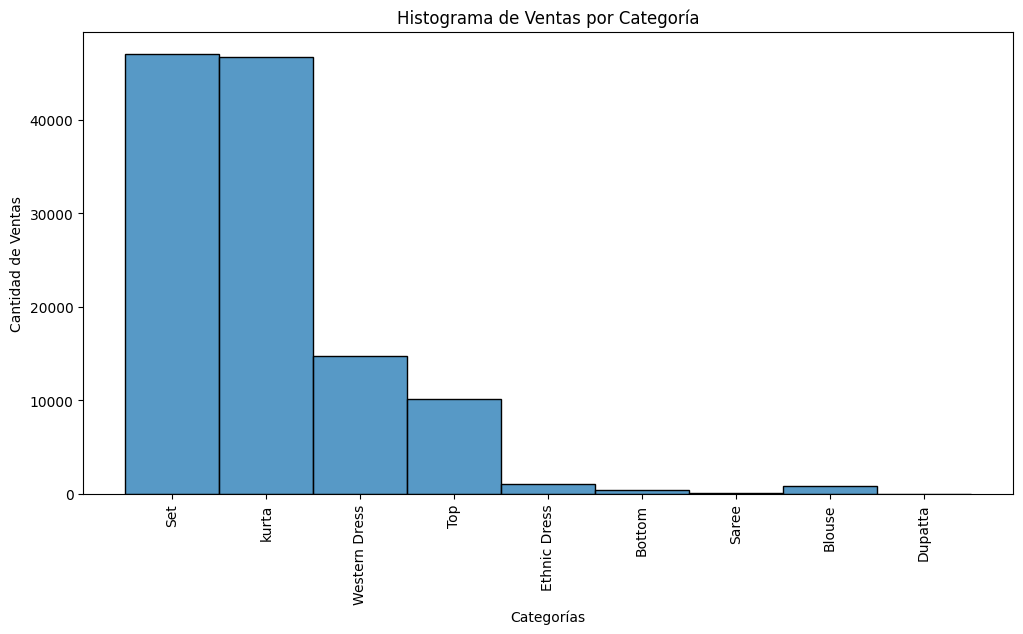

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Category', bins=20)
plt.xticks(rotation=90)
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Ventas')
plt.title('Histograma de Ventas por Categoría')
plt.show()

Se determina claramente que las categorías favoritas de los consumidores son el "Set" y el "Kurta" con una cantidad de ventas prácticamente igualitaria.

C:\Users\gerson.molina\AppData\Local\Temp\ipykernel_2500\3758836975.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


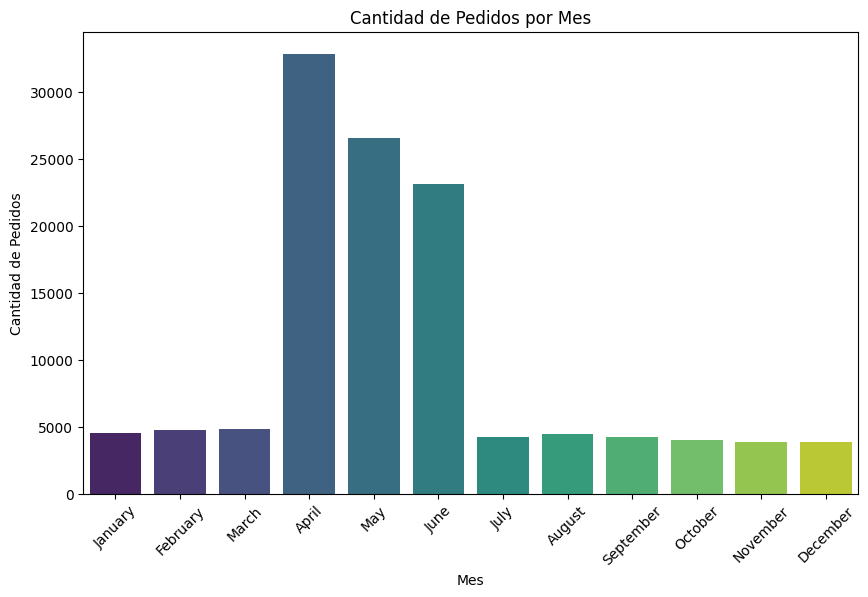

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%B')

pedidos_mensuales = df['Month'].value_counts().reset_index()
pedidos_mensuales.columns = ['Month', 'Order Count']

meses = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
pedidos_mensuales['Month'] = pd.Categorical(pedidos_mensuales['Month'], categories=meses, ordered=True)
pedidos_mensuales = pedidos_mensuales.sort_values('Month')

plt.figure(figsize=(10, 6))
sns.barplot(data=pedidos_mensuales, x='Month', y='Order Count', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad de Pedidos')
plt.title('Cantidad de Pedidos por Mes')
plt.show()

La ventas se obervan amesetadas a lo largo del año, excepto un pico durante los meses de verano (Abril, Mayo, Junio), que registran hasta 6 veces mas las ventas, lo cual puede deberse a estacionalidad.

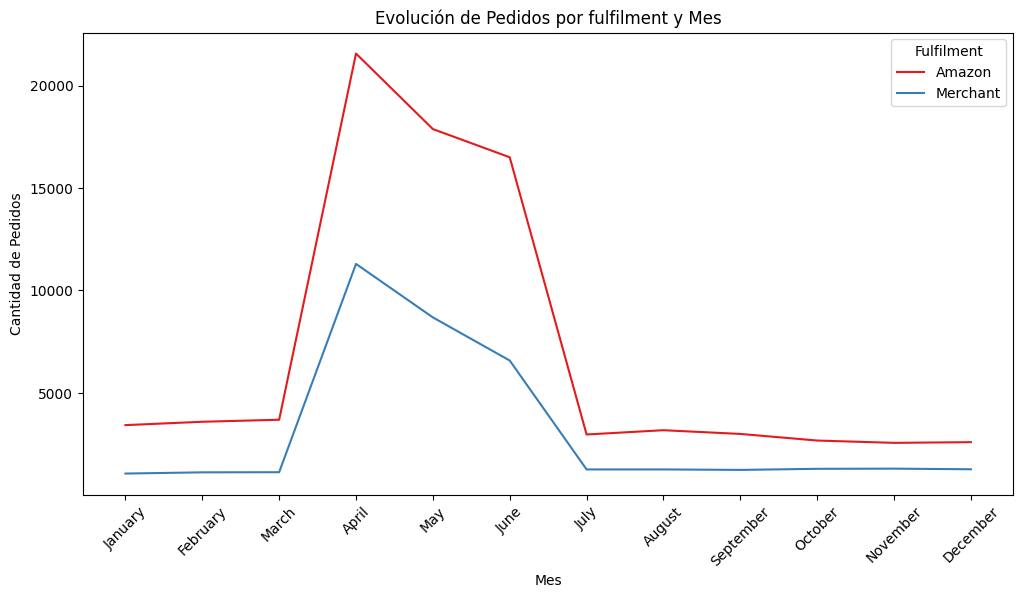

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%B')

cuenta_ordenes_fulfilment = df.groupby(['Fulfilment', 'Month']).size().reset_index(name='Order Count')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cuenta_ordenes_fulfilment['Month'] = pd.Categorical(cuenta_ordenes_fulfilment['Month'], categories=month_order, ordered=True)
cuenta_ordenes_fulfilment = cuenta_ordenes_fulfilment.sort_values(['Fulfilment', 'Month'])

# Crea el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=cuenta_ordenes_fulfilment, x='Month', y='Order Count', hue='Fulfilment', palette='Set1')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad de Pedidos')
plt.title('Evolución de Pedidos por fulfilment y Mes')
plt.legend(title='Fulfilment')
plt.show()

Vemos que durante los meses de Enero a Marzo crecen las ventas respecto al último trimestre del año, notamos un crecimiento durante Abril a Junio, podría deberse a la estacionalidad, vemos que en Abril Amazon supera las ventas al doble respecto a otros vendedores, mientras que durantes los meses de Mayo y Junio las supera casi al triple.